In [1]:
# import libararies

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv(r'C:\Users\prave\Downloads\Bristish Airway Experience Task\customer_booking.csv',encoding="ISO-8859-1")
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0


Below is a more detailed data description, explaining exactly what each column means:

- **num_passengers** : number of passengers travelling
- **sales_channel** : sales channel booking was made on
- **trip_type** : trip Type (Round Trip, One Way, Circle Trip)
- **purchase_lead** : number of days between travel date and booking date
- **length_of_stay** : number of days spent at destination
- **flight_hour** : hour of flight departure
- **flight_day** : day of week of flight departure
- **route** : origin -> destination flight route
- **booking_origin** : country from where booking was made
- **wants_extra_baggage** : if the customer wanted extra baggage in the booking
- **wants_preferred_seat** : if the customer wanted a preferred seat in the booking
- **wants_in_flight_meals** : if the customer wanted in-flight meals in the booking
- **flight_duration** : total duration of flight (in hours)
- **booking_complete** : flag indicating if the customer completed the booking

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  object 
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.3+ 

In [4]:
df.describe()

,num_passengers,purchase_lead,length_of_stay,flight_hour,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
count,50000.000000,50000.000000,50000.00000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,1.591240,84.940480,23.04456,9.06634,0.668780,0.296960,0.427140,7.277561,0.149560
std,1.020165,90.451378,33.88767,5.41266,0.470657,0.456923,0.494668,1.496863,0.356643
min,1.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,4.670000,0.000000
25%,1.000000,21.000000,5.00000,5.00000,0.000000,0.000000,0.000000,5.620000,0.000000
50%,1.000000,51.000000,17.00000,9.00000,1.000000,0.000000,0.000000,7.570000,0.000000
75%,2.000000,115.000000,28.00000,13.00000,1.000000,1.000000,1.000000,8.830000,0.000000
max,9.000000,867.000000,778.00000,23.00000,1.000000,1.000000,1.000000,9.500000,1.000000


In [5]:
# check Nan values
df.isnull().sum()

num_passengers           0
sales_channel            0
trip_type                0
purchase_lead            0
length_of_stay           0
flight_hour              0
flight_day               0
route                    0
booking_origin           0
wants_extra_baggage      0
wants_preferred_seat     0
wants_in_flight_meals    0
flight_duration          0
booking_complete         0
dtype: int64

In [6]:
# check duplicate values
df.duplicated().sum()

719

- We have a 719 duplicate values in the data set. So, let's remove them

In [7]:
# drop duplicate values
df=df.drop_duplicates()

In [8]:
# categories each columns based on num or cat data type

cats = ['sales_channel', 'trip_type','flight_day','route','booking_origin'] #feature categorical and string
cats_int = ['num_passengers','flight_hour','wants_extra_baggage','wants_preferred_seat','wants_preferred_seat','booking_complete']  
nums_int = ['length_of_stay', 'purchase_lead', 'flight_duration',]  #feature numerical and int

In [9]:
for col in cats:
    print(f" value count {col} column:")
    print(df[col].value_counts())
    print(' ')

 value count sales_channel column:
Internet    43917
Mobile       5364
Name: sales_channel, dtype: int64
 
 value count trip_type column:
RoundTrip     48779
OneWay          386
CircleTrip      116
Name: trip_type, dtype: int64
 
 value count flight_day column:
Mon    7988
Wed    7562
Tue    7558
Thu    7323
Fri    6685
Sun    6442
Sat    5723
Name: flight_day, dtype: int64
 
 value count route column:
AKLKUL    2620
PENTPE     912
MELSGN     833
ICNSIN     793
DMKKIX     729
          ... 
AKLHGH       1
JEDPDG       1
JEDPEN       1
DACPEK       1
MRUXIY       1
Name: route, Length: 799, dtype: int64
 
 value count booking_origin column:
Australia               17691
Malaysia                 7055
South Korea              4502
Japan                    3819
China                    3284
                        ...  
Panama                      1
Tonga                       1
Tanzania                    1
Bulgaria                    1
Svalbard & Jan Mayen        1
Name: booking_origin, 

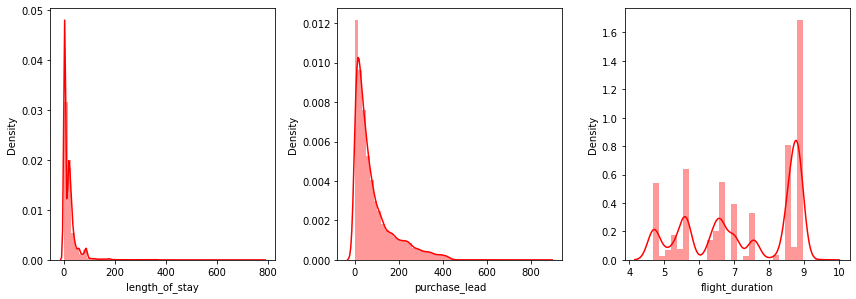

In [10]:
plt.figure(figsize=(12,12))
for i in range(0,len(nums_int)):
    plt.subplot(3,len(nums_int),i+1)
    sns.distplot(df[nums_int[i]],color='red')
    plt.tight_layout()

**Conclusion**             
<!--  -->         
* categorical features:                                           
`sales_channel, trip_type, flight_day, route, booking_origin` features have too many categories. in the pre-processing stage these columns will be subjected to the feature engineering process.                   

<!--  -->               

* Numerical features:                           
1.length_of_stay >> Positive Skew                  
2.purchased_lead >> Positive Skew               
3.flight_duration >> Uniform                    
                      
<!--  -->            
For the positive skew, in the data pre-processing process a log transformation will be carried out.          

<!--  -->         
* There ia an imbalance in the target column, namely the `booking_colplete` column, indicating class imbalance, so it is necessary to do over/undersampling during pre-processing

## Data Cleaning & Feature Engineering

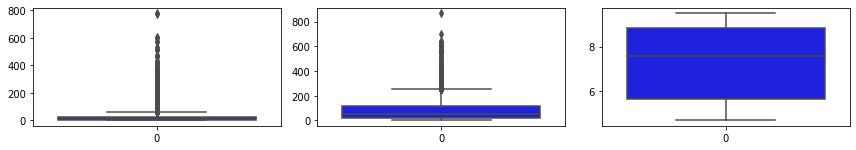

In [11]:
# Handling Outliers

plt.figure(figsize=(12,6))
for i in range(0,len(nums_int)):
    plt.subplot(3,len(nums_int),i+1)
    sns.boxplot(df[nums_int[i]],color='blue')
    plt.tight_layout()

**Conclusion**           
Based on the graph shown above, it can be seen that there are very less outliers in numeric features. so, it looks fine.

## Feature Extraction

1. **total_travel_duration**: Calculated as 'flight_duration' + 'length_of_stay'
2. **extra_services_total**: Calculated as the sum of 'wants_extra_baggage', 'wants_preferred_seat', and 'wants_in_flight_meals'
3. **total_extras**: Calculated as the sum of all extra services and 'num_passengers'

In [12]:
df['total_travel_duration'] = df['flight_duration'] + df['length_of_stay']


df['extra_services_total'] = df['wants_extra_baggage'] + df['wants_preferred_seat'] + df['wants_in_flight_meals']


df['total_extras'] = df['extra_services_total'] + df['num_passengers']


In [13]:
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete,total_travel_duration,extra_services_total,total_extras
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0,24.52,1,3
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0,25.52,0,1
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0,27.52,2,4
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0,36.52,1,2
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0,27.52,2,4


## Feature Encoding                        
<!--  -->             
**Explanation**               
After performing feature transformation, here we also decide to perform feature encoding on columns that have categorical data types to be converted to numerical. 
we do this with the hope that the machine learning capabilities we create can improve. The following are some of the features we are working on at this stage:           
        1. Mapping sales channel, based on channel            
        2. Mapping trip_type , based on trip_type                
        3. MApping flight_day, based on day                     
        4. Mapping route, based on route                         
        5. Mapping booking_origin, based on origin                    
       

In [14]:
mapping = {
    "Mon": 1,
    "Tue": 2,
    "Wed": 3,
    "Thu": 4,
    "Fri": 5,
    "Sat": 6,
    "Sun": 7,
}
df["flight_day"] = df["flight_day"].map(mapping)

In [15]:
from sklearn.preprocessing import LabelEncoder

# Create a Labelncoder object
encoder = LabelEncoder()

# Reshape 'booking_origin' and 'route' to 2D arrays
booking_origin_encoded = encoder.fit_transform(df[['booking_origin']])
route_encoded = encoder.fit_transform(df[['route']])

# Replace the original columns with the encoded values
df['booking_origin'] = booking_origin_encoded
df['route'] = route_encoded

In [16]:
prefix_sales_channel_trip_type = pd.get_dummies(df[['sales_channel', 'trip_type']], prefix='is')

df = pd.concat([df, prefix_sales_channel_trip_type], axis=1)

In [17]:
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,...,flight_duration,booking_complete,total_travel_duration,extra_services_total,total_extras,is_Internet,is_Mobile,is_CircleTrip,is_OneWay,is_RoundTrip
0,2,Internet,RoundTrip,262,19,7,6,0,61,1,...,5.52,0,24.52,1,3,1,0,0,0,1
1,1,Internet,RoundTrip,112,20,3,6,0,61,0,...,5.52,0,25.52,0,1,1,0,0,0,1
2,2,Internet,RoundTrip,243,22,17,3,0,36,1,...,5.52,0,27.52,2,4,1,0,0,0,1
3,1,Internet,RoundTrip,96,31,4,6,0,61,0,...,5.52,0,36.52,1,2,1,0,0,0,1
4,2,Internet,RoundTrip,68,22,15,3,0,36,1,...,5.52,0,27.52,2,4,1,0,0,0,1


In [18]:
df.drop(['sales_channel','trip_type'],axis=1,inplace=True)

## Feature Selection

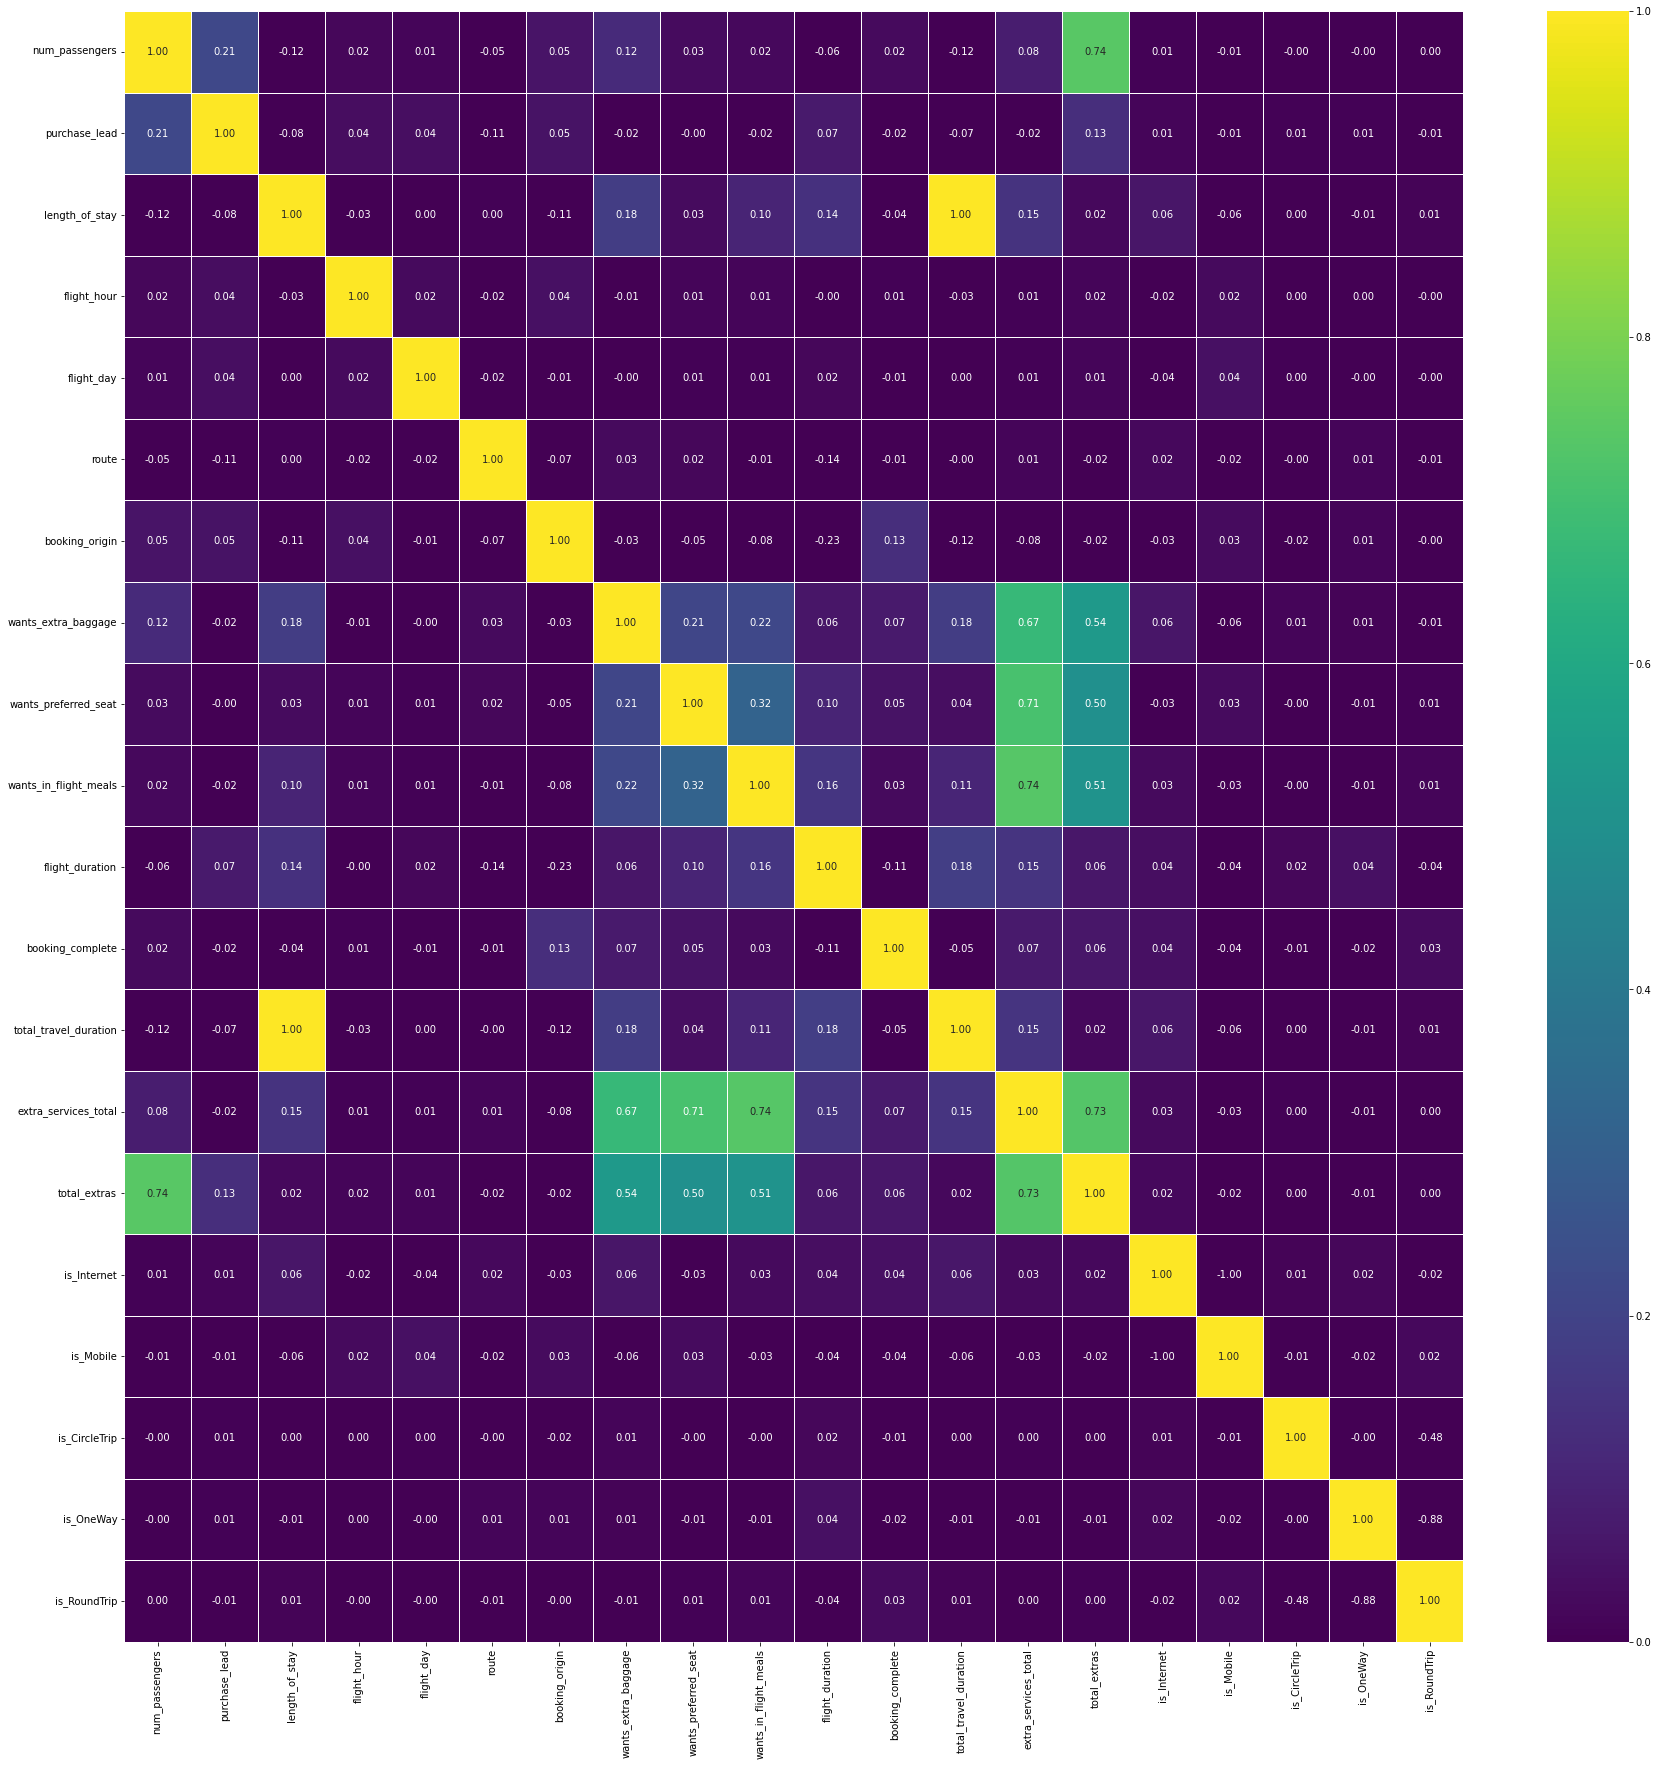

In [19]:
#heatmap
plt.figure(figsize=(30, 30))
sns.heatmap(df.corr(), annot=True, linewidths=.5, fmt='.2f', vmin=0, vmax=1, cmap='viridis')
plt.show() 

In [20]:
# drop "length_of_stay"
df.drop('length_of_stay',axis=1,inplace=True)

In [21]:
# Target Relationship
num_cols=df.columns

tg_num_corr=[]

for col in num_cols:
    tg_num_corr.append(df[col].corr(df['booking_complete']))
    
# create as DataFrame
tg_num_df=pd.DataFrame({'numerical_predictor':num_cols,'correlation_w_target':tg_num_corr})

# sort the DataFrmae by the absolute vaue of their correlation coefficient,descending
tg_num_df=tg_num_df.sort_values(by='correlation_w_target',ascending=False).reset_index(drop=True)

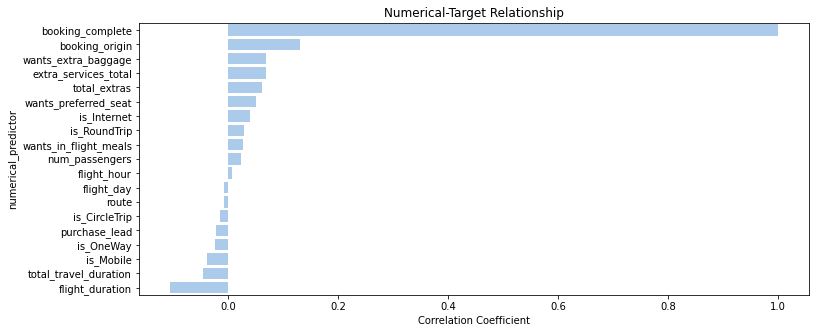

In [22]:
# display as figure
plt.figure(figsize=(12,5))
sns.barplot(x=tg_num_df['correlation_w_target'],y=tg_num_df['numerical_predictor'],color='#a2c9f4')
plt.xlabel('Correlation Coefficient')
plt.title('Numerical-Target Relationship',fontsize=12)
plt.show()

### Balancing the Target Label

In [23]:
df['booking_complete'].value_counts()


0    41890
1     7391
Name: booking_complete, dtype: int64

- The class distribution in our target label appears to be imbalanced. To address this, let's apply label balancing techniques and train the model.

In [24]:
#create a dataframe having all target labels "0" with 8000 samples

df_0 = df[df['booking_complete'] ==0].sample(n=8000) 

In [25]:
#concatenate the two dataframee, one havng all labels 0 and other having all labels as 1

df_new = pd.concat([df[df['booking_complete']==1], df_0], ignore_index=True) 

In [26]:
df_new['booking_complete'].value_counts()

0    8000
1    7391
Name: booking_complete, dtype: int64

In [27]:
df_new.shape

(15391, 19)

 <div style="padding:20px; border-radius:5px;">
    <h1 style="color:black; font-weight:bold; text-align:center;">ML Modeling</h1>
</div>

In [28]:
from sklearn.model_selection import train_test_split

X = df_new.drop('booking_complete',axis=1)
y = df_new['booking_complete']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [29]:
# Normalization

from sklearn.preprocessing import StandardScaler

scale = StandardScaler()
X_train = scale.fit_transform(X_train)
X_test = scale.fit_transform(X_test)

### Random Forest Classifier

In [30]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score, confusion_matrix
from sklearn.inspection import permutation_importance

from sklearn.model_selection import GridSearchCV,  RepeatedStratifiedKFold

In [31]:
'''
 Create functions to fit and predict the values of whether customer would complete the booking.
    Also functions with metrics to evaluate the model prediction.
'''
def model_fit_predict(model, X, y, X_predict):
    model.fit(X, y)
    return model.predict(X_predict)

def acc_score(y_true, y_pred):
    return accuracy_score(y_true, y_pred)

def pre_score(y_true, y_pred):
    return precision_score(y_true, y_pred)

def f_score(y_true, y_pred):
    return f1_score(y_true, y_pred)

 <div style="padding:10px; border-radius:5px;">
    <h3 style="color:black; font-weight:bold; text-align:center;">Checking the Training Accuracy</h3>
</div>

In [32]:
#create an instance of the classifier and fit the training data
clf_rf = RandomForestClassifier(max_depth =20 , min_samples_split=5,max_features=10, random_state=42)

In [33]:
y_pred_train = model_fit_predict(clf_rf, X_train, y_train, X_train)
set(y_pred_train)

#f1 score for training data
f1 = round(f1_score(y_train, y_pred_train),2) 

#accuracy score for training data
acc = round(accuracy_score(y_train, y_pred_train),2) 

#precision score for training data
pre = round(precision_score(y_train, y_pred_train),2) 

print(f"""
      Accuracy={acc},
      Precision={pre},
      and F1-score ={f1} """)


      Accuracy=0.98,
      Precision=0.98,
      and F1-score =0.98 


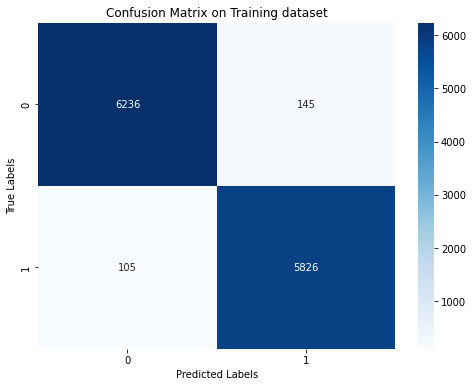

In [34]:
from sklearn.metrics import confusion_matrix
# Traininf confusion matrix

# Make predictions on the training data
y_pred_train = clf_rf.predict(X_train)

# Create a confusion matrix
cm = confusion_matrix(y_train, y_pred_train)

# Convert confusion matrix to a DataFrame for better visualization
labels = np.unique(np.concatenate((y_train, y_pred_train)))
cm_df = pd.DataFrame(cm, index=labels, columns=labels)

# Plot the confusion matrix using seaborn heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm_df, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix on Training dataset')
plt.show()

 <div style="padding:10px; border-radius:5px;">
    <h3 style="color:black; font-weight:bold; text-align:center;">Checking the Test Accuracy</h3>
</div>

In [35]:
#create an instance of the classifier and fit the training data
clf_rf = RandomForestClassifier(max_depth =20 , min_samples_split=5,max_features=10,random_state=42)

y_pred_test = model_fit_predict(clf_rf, X_train, y_train, X_test)

#f1 score for training data
f1 = round(f1_score(y_test, y_pred_test),2) 

#accuracy score for training data
acc = round(accuracy_score(y_test, y_pred_test),2) 

#precision score for training data
pre = round(precision_score(y_test, y_pred_test),2) 
print(f"""
      Accuracy={acc},
      Precision={pre},
      and F1-score ={f1} """)


      Accuracy=0.71,
      Precision=0.68,
      and F1-score =0.7 


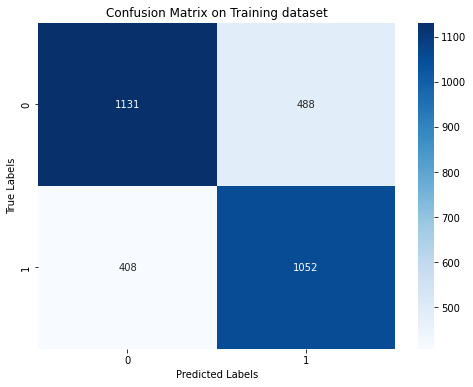

In [36]:
from sklearn.metrics import confusion_matrix
# Traininf confusion matrix

# Make predictions on the training data
y_pred_train = clf_rf.predict(X_test)

# Create a confusion matrix
cm = confusion_matrix(y_test, y_pred_train)

# Convert confusion matrix to a DataFrame for better visualization
labels = np.unique(np.concatenate((y_train, y_pred_train)))
cm_df = pd.DataFrame(cm, index=labels, columns=labels)

# Plot the confusion matrix using seaborn heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm_df, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix on Training dataset')
plt.show()

 <div style="padding:20px; border-radius:5px;">
    <h1 style="color:black; font-weight:bold; text-align:center;">Model Evaluation on Test </h1>
</div>

In [37]:
#create an instance of the classifier and fit the training data
clf_rf = RandomForestClassifier(max_depth =20 , min_samples_split=5,max_features=10, random_state=42)

Accuracy: 70.9%
Precision: 68.31%
F1-score: 70.13%
Recall: 72.05%
Specificity: 69.86%


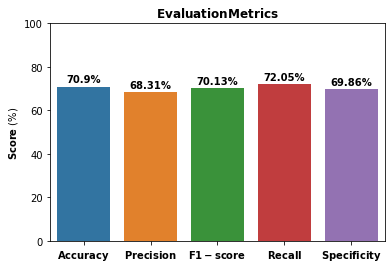

In [38]:
# Fit the model on the training data and make predictions
clf_rf.fit(X_train, y_train)
y_pred_test = clf_rf.predict(X_test)

# Calculate evaluation metrics
f1 = round(f1_score(y_test, y_pred_test) * 100, 2)
accuracy = round(accuracy_score(y_test, y_pred_test) * 100, 2)
precision = round(precision_score(y_test, y_pred_test) * 100, 2)
recall = round(recall_score(y_test, y_pred_test) * 100, 2)
specificity = round(recall_score(y_test, y_pred_test, pos_label=0) * 100, 2)

print(f"Accuracy: {accuracy}%")
print(f"Precision: {precision}%")
print(f"F1-score: {f1}%")
print(f"Recall: {recall}%")
print(f"Specificity: {specificity}%")

# Create a bar plot to visualize evaluation metrics
metrics = {
    r'$\bf{Accuracy}$': accuracy,
    r'$\bf{Precision}$': precision,
    r'$\bf{F1-score}$': f1,
    r'$\bf{Recall}$': recall,
    r'$\bf{Specificity}$': specificity
}

sns.barplot(x=list(metrics.keys()), y=list(metrics.values()))
plt.ylabel(r'$\bf{Score}$ (%)')
plt.title(r'$\bf{Evaluation Metrics}$')

# Annotate the bars with their corresponding numeric values
ax = plt.gca()
for idx, val in enumerate(metrics.values()):
    ax.text(idx, val + 1, str(val) + '%', ha='center', va='bottom', fontweight='bold', fontsize=10)

plt.ylim(0, 100)
plt.savefig('Evaluation metrics.png', bbox_inches='tight')         
plt.show()

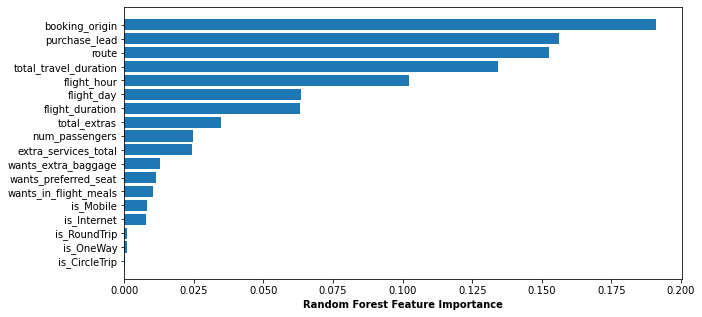

In [39]:
# Feature Importance

plt.figure(figsize=(10,5))
sorted_idx = clf_rf.feature_importances_.argsort()
plt.barh(df.drop('booking_complete',axis=1).columns[sorted_idx], clf_rf.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance", fontweight="bold")
plt.savefig('Random Forest Feature Importance.png', bbox_inches='tight')
plt.show()